<a href="https://colab.research.google.com/github/Petint/AI-and-DS/blob/main/AI-1/ai-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 1


In [33]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
#gtgg

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [35]:
uniqe, count = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(uniqe, count)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [36]:
uniqe, count = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(uniqe, count)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


## Vizualiére

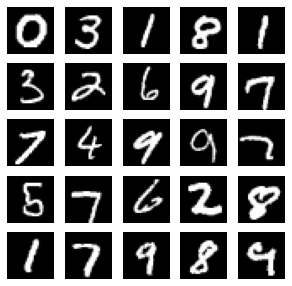

In [37]:
indexes = np.random.randint(0, len(x_train), size=25)
images = x_train[indexes]

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.reshape(images[i],(28,28)), cmap='gray')
    plt.axis('off')
plt.show()


In [38]:
num_labels = 10
input_size = 28*28
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [39]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

## We need to build a w-- Network!

In [40]:
from keras.engine.sequential import Sequential
dropout = 0.45
hidden_nodes = 256
batch_size = 128
model = Sequential()
model.add(Dense(hidden_nodes, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden_nodes))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

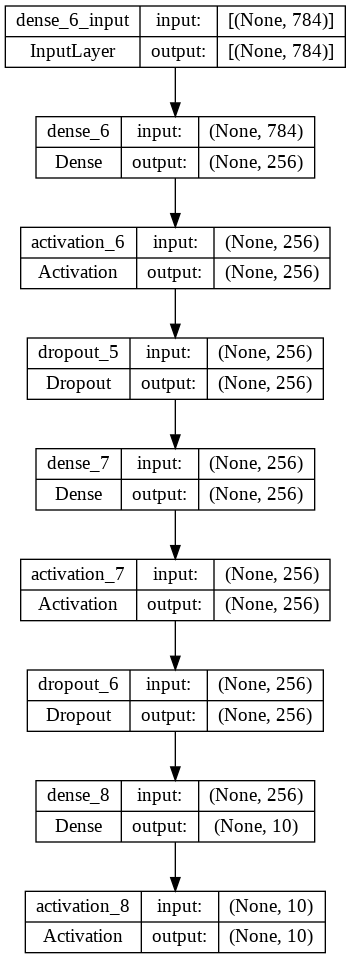

In [42]:
plot_model(model, show_shapes=True)

In [43]:
## Complie model

In [44]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

## Fit model

In [45]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.4351 - accuracy: 0.8659
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1948 - accuracy: 0.9414
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1526 - accuracy: 0.9535
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1281 - accuracy: 0.9611
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1126 - accuracy: 0.9656
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1017 - accuracy: 0.9686
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0957 - accuracy: 0.9700
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0870 - accuracy: 0.9728
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0823 - accuracy: 0.9741
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0766 - accuracy: 0.9759